In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

In [2]:
def tirage(m):
    x = np.random.uniform(-m, m)
    y = np.random.uniform(-m, m)
    return (x,y)

In [3]:
def monteCarlo(N):
    p = 0
    absc = np.zeros(N)
    ordo = np.zeros(N)
    for i in range(N):
        x, y = tirage(1)
        absc[i] = x
        ordo[i] = y
        if np.square(x) + np.square(y) < 1:
            p += 1
    pi = 4*p / N
    
    return pi, absc, ordo

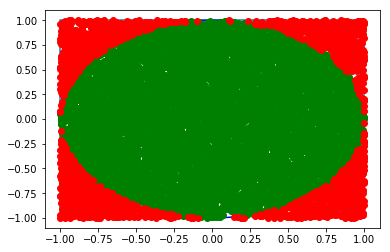

In [4]:
plt.figure()

# trace le carré
plt.plot([-1, -1, 1, 1], [-1, 1, 1, -1], '-')

# trace le cercle
x = np.linspace(-1, 1, 100)
y = np.sqrt(1- x*x)
plt.plot(x, y, 'b')
plt.plot(x, -y, 'b')

# estimation par Monte Carlo
pi, x, y = monteCarlo(int(1e4))

# trace les points dans le cercle et hors du cercle
dist = x*x + y*y
plt.plot(x[dist <=1], y[dist <=1], "go")
plt.plot(x[dist>1], y[dist>1], "ro")
plt.show()


In [5]:
# si vos fichiers sont dans un repertoire "ressources"
with open("./countWar.pkl", 'rb') as f:
    (count, mu, A) = pkl.load(f, encoding='latin1')

with open("./secret.txt", 'r') as f:
    secret = f.read()[0:-1] # -1 pour supprimer le saut de ligne
    
with open("./secret2.txt", 'r') as f:
    secret2 = f.read()[0:-1] # -1 pour supprimer le saut de ligne


In [6]:
# def swapF(f, chars):
#     f2 = dict(f)
#     l = len(f)
#     a = np.random.randint(0, l)
#     b = np.random.randint(0, l)
#     t = f2[chars[a]]
#     f2[chars[a]] = f2[chars[b]]
#     f2[chars[b]] = t
#     return f2
    
def swapF(tau):
    tau_t = dict(tau)
    nb_1 = np.random.randint(0, len(tau))
    nb_2 = np.random.randint(0, len(tau))
    t = tau_t[list(tau_t)[nb_1]]
    tau_t[list(tau_t)[nb_1]] = tau_t[list(tau_t)[nb_2]]
    tau_t[list(tau_t)[nb_2]] = t
    return tau_t

tau = {'a' : 'b', 'b' : 'c', 'c' : 'a', 'd' : 'd' }
tau2 = dict(tau)
swapF(tau)

{'a': 'a', 'b': 'c', 'c': 'b', 'd': 'd'}

In [7]:
def decrypt(mess, tau):
    new_mess = ''
    for l in range(len(mess)):
        new_mess += tau[mess[l]]
    return new_mess

print( decrypt ( "aabcd", tau ) )
print( decrypt ( "dcba", tau ) )

bbcad
dacb


In [8]:
chars2index = dict(zip(np.array(list(count.keys())), np.arange(len(count.keys()))))

In [9]:
def logLikelihood(mess, mu, A, chars2index):
    logL = np.log(mu[chars2index[mess[0]]])
    for l in range(1, len(mess)):
        logL += np.log(A[chars2index[mess[l-1]], chars2index[mess[l]]])
    return logL

print(logLikelihood( "abcd", mu, A, chars2index ))
print(logLikelihood( "dcba", mu, A, chars2index ))

-24.600258560804818
-26.274828997400395


In [36]:
def MetropolisHastings(mess, mu, A, tau, N, chars2index):
    
    mess_d = decrypt(mess, tau)
    logL = logLikelihood(mess_d, mu, A, chars2index)
    
    for i in range(N):
        
        new_tau = swapF(tau)
        mess_d_2 = decrypt(mess, new_tau)
        logL_2 = logLikelihood(mess_d_2, mu, A, chars2index)
    
        alpha = min(1, logL_2/logL)
    
        r = np.random.rand()
    
        if r <= alpha:
    
            if (logL < logL_2):
                logL = logL_2
                mess_d = mess_d_2
                tau = new_tau

                print("New log temporaire : ", logL)
                print("New message temporaire : ", mess_d)
            
    print("Log final : ", logL)
    
    return mess_d

def identityTau (count):
    tau = {}
    for k in list(count.keys ()):
        tau[k] = k
    return tau

# MetropolisHastings( secret2, mu, A, identityTau (count), 10000, chars2index)

In [37]:
# ATTENTION: mu = proba des caractere init, pas la proba stationnaire
# => trouver les caractères fréquents = sort (count) !!
# distribution stationnaire des caracteres
freqKeys = np.array(list(count.keys()))
freqVal  = np.array(list(count.values()))
# indice des caracteres: +freq => - freq dans la references
rankFreq = (-freqVal).argsort()

# analyse mess. secret: indice les + freq => - freq
cles = np.array(list(set(secret2))) # tous les caracteres de secret2
rankSecret = np.argsort(-np.array([secret2.count(c) for c in cles]))
# ATTENTION: 37 cles dans secret, 77 en général... On ne code que les caractères les plus frequents de mu, tant pis pour les autres
# alignement des + freq dans mu VS + freq dans secret
tau_init = dict([(cles[rankSecret[i]], freqKeys[rankFreq[i]]) for i in range(len(rankSecret))])

MetropolisHastings(secret2, mu, A, tau_init, 50000, chars2index)

New log temporaire :  -4814.720343013674
New message temporaire :  "rr sfcna tuheauet snpe idnperem nroa, isni wnisv "ddhpha, ni halhahiethcnrty cnisecnihuty ise coti eInui ol tuheauety nbnamoat ise wdouett ol nanrgtht nam eaiedt oa ise ae. wdouett ol ise haie,dnihoa ol fakao.ay halhahierg tcnrry 'fnaihihetv "bnamoaha, ise uoauewihoa ol unftey cnisecnihut teekt rn.y isni hty ise wdowedig uoccoa io nrr fakao.ay halhahierg tcnrry ereceaitv Pa naoised lodc bfi nroa, ise tnce wnis ol delreuihoa ise oised tuheauet snpe wdoueememv Bsea Te.ioa eafauhniem ise rn. ol ,dnphig se mhm aoi tng isni ise tfa od ise endis snm n wdowedig ol niidnuihoa! se tnhm isni nrr bomhet ldoc ise rnd,eti io ise tcnrreti snpe ise wdowedig ol niidnuiha, oae naoisedy isni hty renpha, nthme ise 'fetihoa ol ise unfte ol ise copeceai ol ise bomhety se eIwdettem ise wdowedig uoccoa io nrr bomhet ldoc ise halhahierg rnd,e io ise halhahierg tcnrrv -se tnce ht moae bg ise anifdnr tuheauetx renpha, nthme ise 'fetihoa ol unft

New log temporaire :  -4454.862154226238
New message temporaire :  Irr sflia udheadeu sipe tniperem iroa, tsit wits" Innhpha, it hakhahteuhliruy litselithduy tse lout evidt ok udheadeuy ibiamoau tse wnodeuu ok iairguhu iam eatenu oa tse ae. wnodeuu ok tse hate,nithoa ok facao.ay hakhahterg ulirry 'fiaththeu" Ibiamoaha, tse doadewthoa ok difuey litselithdu ueecu ri.y tsit huy tse wnowentg dolloa to irr facao.ay hakhahterg ulirry ereleatu" Pa iaotsen konl bft iroa, tse uile wits ok nekredthoa tse otsen udheadeu sipe wnodeemem" Asea Te.toa eafadhitem tse ri. ok ,niphtg se mhm aot uig tsit tse ufa on tse eints sim i wnowentg ok ittnidthoa! se uihm tsit irr bomheu knol tse rin,eut to tse ulirreut sipe tse wnowentg ok ittnidtha, oae iaotseny tsit huy reipha, iuhme tse 'feuthoa ok tse difue ok tse lopeleat ok tse bomheuy se evwneuuem tse wnowentg dolloa to irr bomheu knol tse hakhahterg rin,e to tse hakhahterg ulirr" -se uile hu moae bg tse aitfnir udheadeux reipha, iuhme tse 'feuthoa ok difu

New log temporaire :  -3790.3687737460327
New message temporaire :  Trr hmliu acseucea hipe tnipered iroug thit with. Tnnspsug it suksusteaslira, lithelitsca, the loat exict ok acseucea, ibiudoua the wnoceaa ok iuiryasa iud eutena ou the uev wnoceaa ok the sutegnitsou ok mufuovu, suksustery alirr, Imiutstsea. Tbiudousug the coucewtsou ok cimae, lithelitsca aeefa riv, thit sa, the wnowenty collou to irr mufuovu, suksustery alirr, ereleuta. Bu iuothen konl bmt iroug the aile with ok nekrectsou the othen acseucea hipe wnoceeded. 'heu Pevtou eumucsited the riv ok gnipsty he dsd uot aiy thit the amu on the einth hid i wnowenty ok ittnictsou! he aisd thit irr bodsea knol the ringeat to the alirreat hipe the wnowenty ok ittnictsug oue iuothen, thit sa, reipsug iasde the Imeatsou ok the cimae ok the lopeleut ok the bodsea, he exwneaaed the wnowenty collou to irr bodsea knol the suksustery ringe to the suksustery alirr. -he aile sa doue by the uitmnir acseucea" reipsug iasde the Imeatsou ok cim

New log temporaire :  -3733.6828447688154
New message temporaire :  Arr hldiu acseucea hive tniverem iroug thit with. Annsvsug it suksusteasdira, ditheditsca, the doat exict ok acseucea, ibiumoua the wnoceaa ok iuiryasa ium eutena ou the uef wnoceaa ok the sutegnitsou ok lupuofu, suksustery adirr, Pliutstsea. Abiumousug the coucewtsou ok cilae, ditheditsca aeepa rif, thit sa, the wnowenty coddou to irr lupuofu, suksustery adirr, eredeuta. Bu iuothen kond blt iroug the aide with ok nekrectsou the othen acseucea hive wnoceemem. "heu Teftou eulucsitem the rif ok gnivsty he msm uot aiy thit the alu on the einth him i wnowenty ok ittnictsou! he aism thit irr bomsea knod the ringeat to the adirreat hive the wnowenty ok ittnictsug oue iuothen, thit sa, reivsug iasme the Pleatsou ok the cilae ok the dovedeut ok the bomsea, he exwneaaem the wnowenty coddou to irr bomsea knod the suksustery ringe to the suksustery adirr. -he aide sa moue by the uitlnir acseucea' reivsug iasme the Pleatsou ok cil

New log temporaire :  -3366.0552587890847
New message temporaire :  All humas rciescer have tnaveled alosg that wath. Annivisg at isfisiterimalr, mathematicr, the mort e-act of rciescer, abasdosr the wnocerr of asalyrir asd estenr os the sep wnocerr of the istegnatios of usksops, isfisitely rmall, Puastitier. Abasdosisg the coscewtios of caure, mathematicr reekr lap, that ir, the wnowenty commos to all usksops, isfisitely rmall, elemestr. Bs asothen fonm but alosg the rame wath of neflectios the othen rciescer have wnoceeded. "hes Heptos esusciated the lap of gnavity he did sot ray that the rus on the eanth had a wnowenty of attnactios! he raid that all bodier fnom the langert to the rmallert have the wnowenty of attnactisg ose asothen, that ir, leavisg aride the Puertios of the caure of the movemest of the bodier, he e-wnerred the wnowenty commos to all bodier fnom the isfisitely lange to the isfisitely rmall. The rame ir dose by the satunal rciescer' leavisg aride the Puertios of cau

New log temporaire :  -3086.359611220995
New message temporaire :  All human sciences have traveled along that path. Arriving at infinitesimals, mathematics, the most exact of sciences, abandons the process of analysis and enters on the new process of the integration of unknown, infinitely small, Buantities. Abandoning the conception of cause, mathematics seeks law, that is, the property common to all unknown, infinitely small, elements. In another form but along the same path of reflection the other sciences have proceeded. "hen Hewton enunciated the law of gravity he did not say that the sun or the earth had a property of attraction' he said that all bodies from the largest to the smallest have the property of attracting one another, that is, leaving aside the Buestion of the cause of the movement of the bodies, he expressed the property common to all bodies from the infinitely large to the infinitely small. The same is done by the natural sciences! leaving aside the Buestion of caus

'All human sciences have traveled along that path. Arriving at infinitesimals, mathematics, the most exact of sciences, abandons the process of analysis and enters on the new process of the integration of unknown, infinitely small, Buantities. Abandoning the conception of cause, mathematics seeks law, that is, the property common to all unknown, infinitely small, elements. In another form but along the same path of reflection the other sciences have proceeded. "hen Hewton enunciated the law of gravity he did not say that the sun or the earth had a property of attraction\' he said that all bodies from the largest to the smallest have the property of attracting one another, that is, leaving aside the Buestion of the cause of the movement of the bodies, he expressed the property common to all bodies from the infinitely large to the infinitely small. The same is done by the natural sciences! leaving aside the Buestion of cause, they seek for laws. Pistory stands on the same path. And if hi

In [ ]:
3134